In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from pandas.plotting import scatter_matrix

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/ageron/handson-ml2/master/datasets/housing/housing.csv')

# Exercicio: Predição de valores médios de casas nessa região

A variável alvo do nosso modelo será `median_house_value`

## Quantas instâncias e quantas características o dataset tem? Quais os tipos das variaveis?

In [3]:
len(df)

20640

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

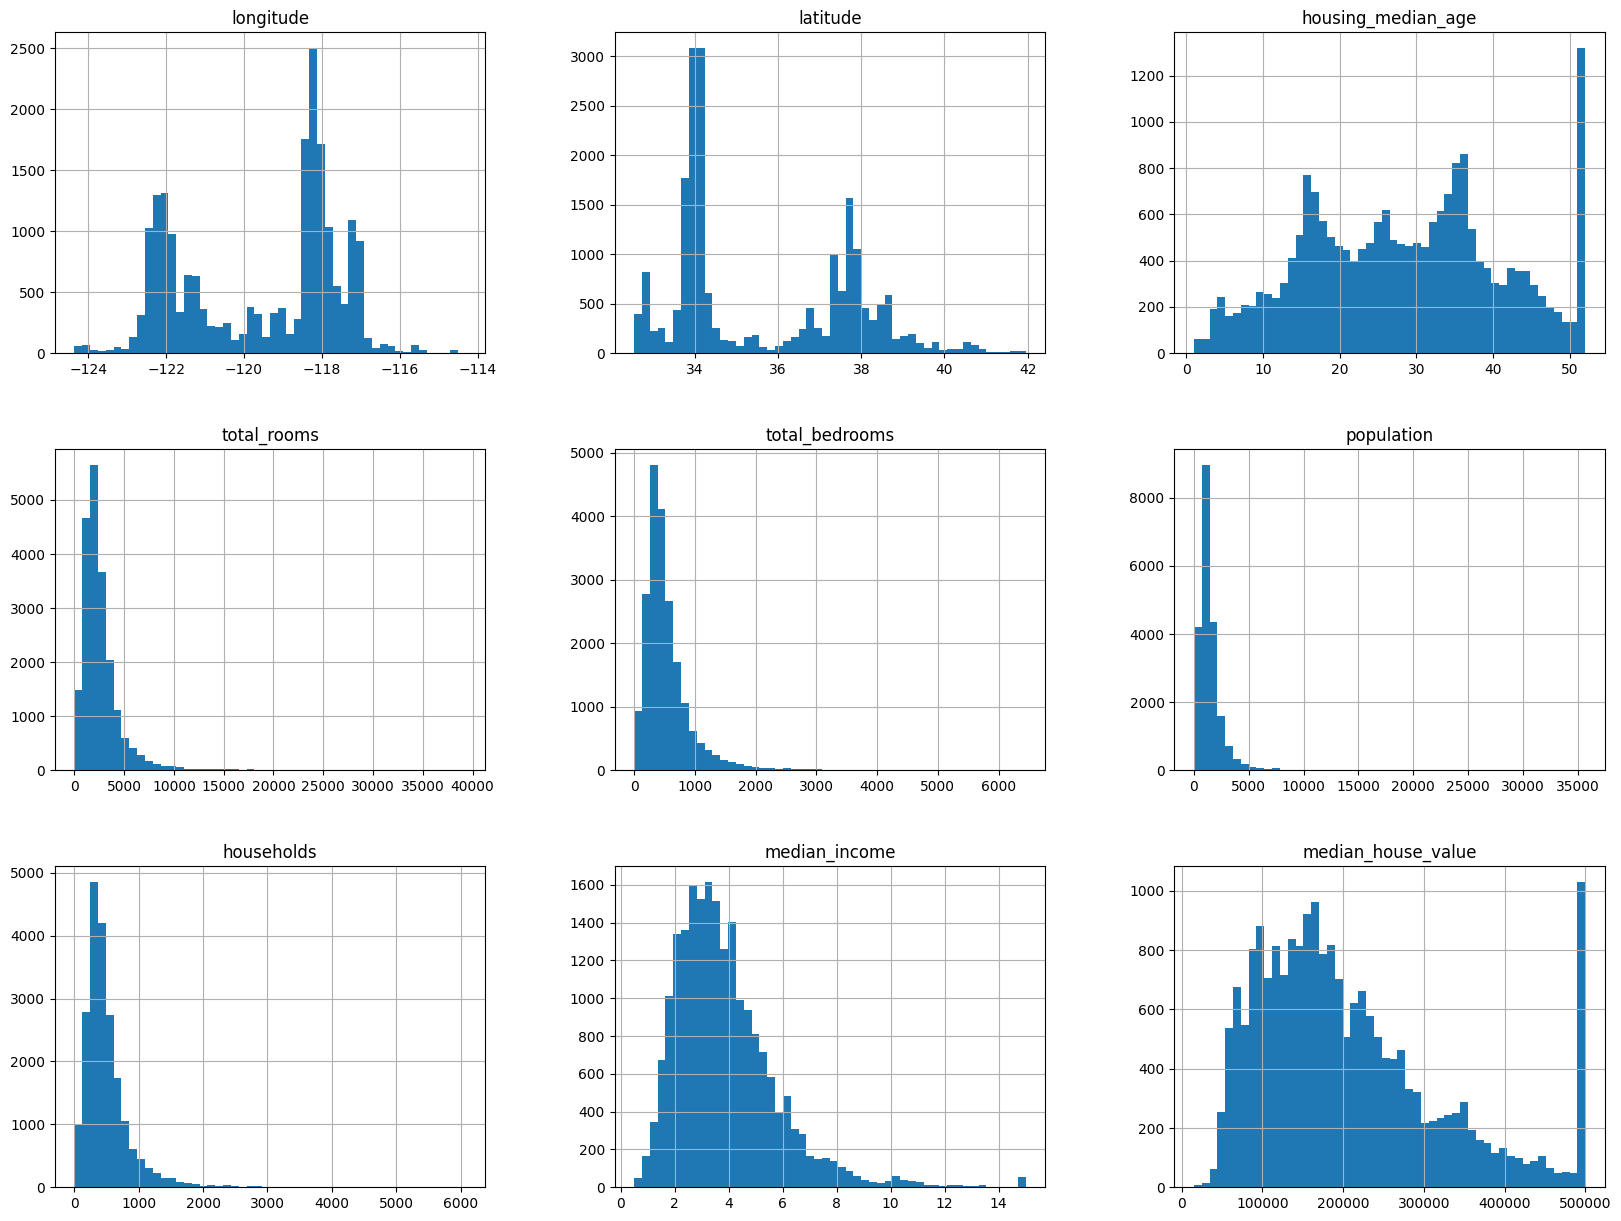

In [6]:
df.hist(bins=50, figsize=(20,15))

## Alguma das características pode ser considerada a variável alvo?

In [7]:
df[['median_house_value', 'median_income']].head()

,median_house_value,median_income
0,452600.0,8.3252
1,358500.0,8.3014
2,352100.0,7.2574
3,341300.0,5.6431
4,342200.0,3.8462


## Existem dados faltosos? Em quais variáveis

In [8]:
df.isnull().any()

longitude             False
latitude              False
housing_median_age    False
total_rooms           False
total_bedrooms         True
population            False
households            False
median_income         False
median_house_value    False
ocean_proximity       False
dtype: bool

In [9]:
df['total_bedrooms'].isnull().sum()

207

TODO: tentar criar um modelo a partir disso
TODO: gerar os histogramas

## Criando o conjunto de teste

Primeiro vamos separar nosso conjunto de teste e o de treinamento

In [10]:
train_set, test_set = train_test_split(df, test_size=0.2,random_state=42)

Agora, vamos comparar a distribuição do median_income dos dados de treinamento e os dados totais.

<Axes: >

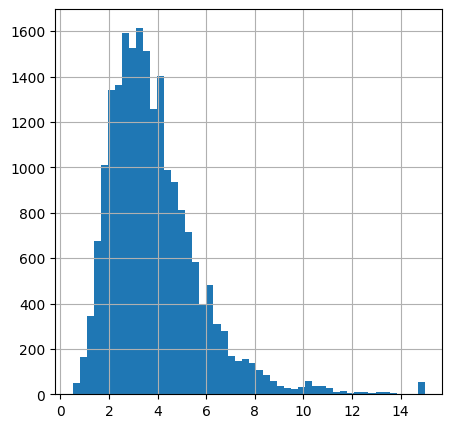

In [11]:
df["median_income"].hist(bins = 50, figsize=(5,5))

<Axes: >

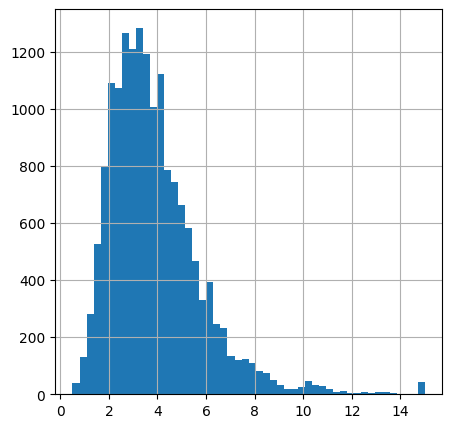

In [12]:
train_set["median_income"].hist(bins = 50,figsize=(5,5))

Nesse caso, temos uma proporção bem discrepante de casas mais baratas para casas mais baratas.  
Se rodarmos nosso modelo assim, nosso modelo irá ficar enviesado para casas com median_income mais baixas.

In [13]:
df["income_cat"] = pd.cut(df['median_income'], bins=[0, 1.5, 3.0, 4.5, 6.0, np.inf], labels=[1,2,3,4,5])

Aqui estamos categorizando as linhas do dataset a partir do median_income

In [14]:
# o normalize=True faz a medida de frequencia relativa
# de todo nosso dataset, 35% dos dados ta na classe 3, 31% ta na classe 2 etc
df["income_cat"].value_counts(normalize=True)*100

3    35.058140
2    31.884690
4    17.630814
5    11.443798
1     3.982558
Name: income_cat, dtype: float64

Com o split iremos particionar os dados de teste e treinamento de forma correta, com uma proporção melhor

In [15]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

In [16]:
for train_index, test_index in split.split(df, df["income_cat"]):
    strat_train_set = df.loc[train_index]
    strat_test_set = df.loc[test_index]

<Axes: >

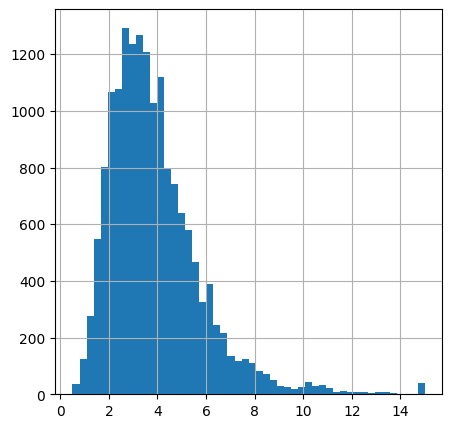

In [17]:
strat_train_set["median_income"].hist(bins = 50, figsize=(5,5))

<Axes: >

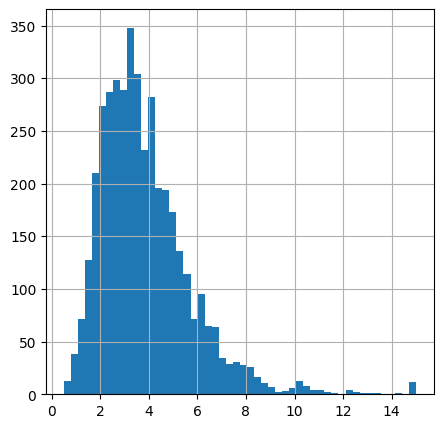

In [18]:
strat_test_set["median_income"].hist(bins = 50, figsize=(5,5))

In [19]:
for i in (strat_train_set, strat_test_set):
    i.drop("income_cat", axis=1, inplace=True)

Vamos checar nossos dados de teste

Essa é a distribuição espacial das casas

In [21]:
corr_matrix = strat_test_set.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

D:\Users\201911250022\AppData\Local\Temp\ipykernel_2556\1355372494.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = strat_test_set.corr()


median_house_value    1.000000
median_income         0.691867
total_rooms           0.131296
housing_median_age    0.071210
households            0.070947
total_bedrooms        0.057247
population           -0.016164
longitude            -0.039848
latitude             -0.150336
Name: median_house_value, dtype: float64

array([[<Axes: xlabel='median_house_value', ylabel='median_house_value'>,
        <Axes: xlabel='median_income', ylabel='median_house_value'>,
        <Axes: xlabel='total_rooms', ylabel='median_house_value'>,
        <Axes: xlabel='housing_median_age', ylabel='median_house_value'>],
       [<Axes: xlabel='median_house_value', ylabel='median_income'>,
        <Axes: xlabel='median_income', ylabel='median_income'>,
        <Axes: xlabel='total_rooms', ylabel='median_income'>,
        <Axes: xlabel='housing_median_age', ylabel='median_income'>],
       [<Axes: xlabel='median_house_value', ylabel='total_rooms'>,
        <Axes: xlabel='median_income', ylabel='total_rooms'>,
        <Axes: xlabel='total_rooms', ylabel='total_rooms'>,
        <Axes: xlabel='housing_median_age', ylabel='total_rooms'>],
       [<Axes: xlabel='median_house_value', ylabel='housing_median_age'>,
        <Axes: xlabel='median_income', ylabel='housing_median_age'>,
        <Axes: xlabel='total_rooms', ylabel='housi

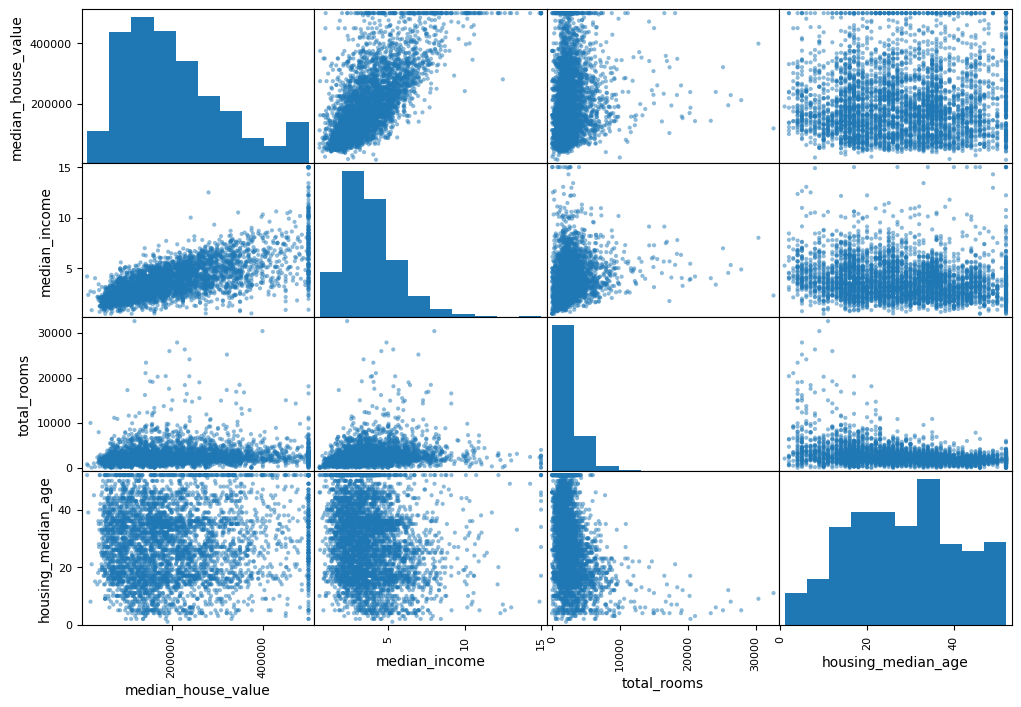

In [22]:
attributes = ["median_house_value", "median_income", "total_rooms",
              "housing_median_age"]
scatter_matrix(strat_test_set[attributes], figsize=(12, 8))

Nesse grafico e na celula anterior a ele podemos ver que as variaveis não estão nem um pouco relacionadas ao median_house_value

In [23]:
strat_test_set["rooms_per_household"] = strat_test_set["total_rooms"]/strat_test_set["households"]
strat_test_set["bedrooms_per_room"] = strat_test_set["total_bedrooms"]/strat_test_set["total_rooms"]
strat_test_set["population_per_household"] = strat_test_set["population"]/strat_test_set["households"]


In [24]:
corr_matrix = strat_test_set.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

D:\Users\201911250022\AppData\Local\Temp\ipykernel_2556\1355372494.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = strat_test_set.corr()


median_house_value          1.000000
median_income               0.691867
rooms_per_household         0.192731
total_rooms                 0.131296
housing_median_age          0.071210
households                  0.070947
total_bedrooms              0.057247
population                 -0.016164
longitude                  -0.039848
population_per_household   -0.134999
latitude                   -0.150336
bedrooms_per_room          -0.240481
Name: median_house_value, dtype: float64

## Preparação dos dados
- Regressão so trabalha com dados numéricos
    - Como transformar variáveis não numericas pra poder utilizalas? (Podemos usar o "One Hot Encoder" ou o "Ordinal Encoder")
- Regressão é sensível à dados faltosos
- Regressão é sesível à escala dos atributos/variáveis
    - Que variáveis precisam ser escalonadas e por quais métodos?

TODO: gerar um conjunto de dados modificado

In [26]:
strat_test_set.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,bedrooms_per_room,population_per_household
count,4128.000000,4128.000000,4128.000000,4128.000000,4079.000000,4128.000000,4128.000000,4128.000000,4128.000000,4128.000000,4079.000000,4128.000000
mean,-119.545981,35.602049,28.583818,2688.656250,549.721746,1448.634205,509.651163,3.849818,206257.795058,5.383375,0.213705,2.967399
std,2.010400,2.127889,12.629796,2345.997876,454.528621,1197.164964,407.677609,1.879332,114176.653346,1.822694,0.060349,1.584661
min,-124.180000,32.550000,1.000000,2.000000,1.000000,5.000000,1.000000,0.499900,14999.000000,0.846154,0.100000,1.089286
25%,-121.780000,33.920000,18.000000,1474.000000,301.000000,805.750000,283.000000,2.542675,118900.000000,4.434273,0.175927,2.424681
50%,-118.460000,34.220000,28.000000,2159.500000,442.000000,1172.500000,416.000000,3.513200,181300.000000,5.218307,0.203604,2.822308
75%,-117.980000,37.690000,37.000000,3171.250000,653.000000,1754.250000,613.250000,4.739225,268850.000000,6.031716,0.239791,3.286534
max,-114.560000,41.950000,52.000000,32627.000000,6445.000000,28566.000000,6082.000000,15.000100,500001.000000,37.063492,1.000000,63.750000


In [30]:
strat_test_set[strat_test_set["households"] < 10]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
6920,-118.05,34.02,31.0,40.0,8.0,25.0,7.0,2.1250,375000.0,<1H OCEAN,5.714286,0.200000,3.571429
12458,-114.62,33.62,26.0,18.0,3.0,5.0,3.0,0.5360,275000.0,INLAND,6.000000,0.166667,1.666667
2511,-119.54,36.51,36.0,49.0,7.0,28.0,2.0,4.6250,162500.0,INLAND,24.500000,0.142857,14.000000
13606,-117.27,34.17,16.0,30.0,3.0,49.0,8.0,4.6250,250000.0,INLAND,3.750000,0.100000,6.125000
12649,-121.47,38.51,52.0,20.0,4.0,74.0,9.0,3.6250,80000.0,INLAND,2.222222,0.200000,8.222222
18210,-122.06,37.39,26.0,18.0,4.0,8.0,4.0,3.7500,375000.0,NEAR BAY,4.500000,0.222222,2.000000
16171,-122.50,37.79,52.0,8.0,1.0,13.0,1.0,15.0001,500001.0,NEAR BAY,8.000000,0.125000,13.000000
6348,-117.75,34.06,52.0,24.0,6.0,46.0,7.0,1.6250,67500.0,INLAND,3.428571,0.250000,6.571429
4093,-118.42,34.16,46.0,54.0,9.0,20.0,6.0,0.5360,375000.0,<1H OCEAN,9.000000,0.166667,3.333333
5628,-118.27,33.76,46.0,22.0,11.0,32.0,7.0,3.1250,112500.0,NEAR OCEAN,3.142857,0.500000,4.571429


In [36]:
strat_test_set["ocean_proximity"].agg()

ValueError: No objects to concatenate